In [34]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load the Dataset
This step loads the dataset and explores its structure. The goal is to understand the features, identify missing values, and assess the data types to prepare for further processing.

In [35]:
# Load and Explore the Dataset
data = pd.read_csv('data_daegu_apartment.csv')
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())
print("\nBasic Statistics:\n", data.describe())


Dataset Head:
   HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
0    terraced       0-5min  Kyungbuk_uni_hospital                      0.0   
1    terraced  10min~15min  Kyungbuk_uni_hospital                      1.0   
2       mixed  15min~20min       Chil-sung-market                      1.0   
3       mixed   5min~10min                Bangoge                      5.0   
4    terraced       0-5min                Sin-nam                      0.0   

   N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
0                               3.0                         2.0   
1                               5.0                         1.0   
2                               7.0                         3.0   
3                               5.0                         4.0   
4                               1.0                         2.0   

   N_Parkinglot(Basement)  YearBuilt  N_FacilitiesInApt  Size(sqf)  SalePrice  
0                  1270.0       2

## Data Cleaning
In this step, missing values are handled by replacing them with the median to prevent skewing the data. Categorical variables are encoded into numerical format using one-hot encoding to make them compatible with machine learning models.

In [36]:
# Data Cleaning
if data.isnull().sum().any():
    data.fillna(data.median(), inplace=True)
    print("Missing values have been filled with the median.")

categorical_features = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


## Feature Engineering
A new feature, Age, is created to represent the age of the apartment since it was built. This simplifies time-related calculations. The YearBuilt column is dropped as it is no longer needed. A correlation matrix is plotted to identify relationships between features and their impact on the target variable.

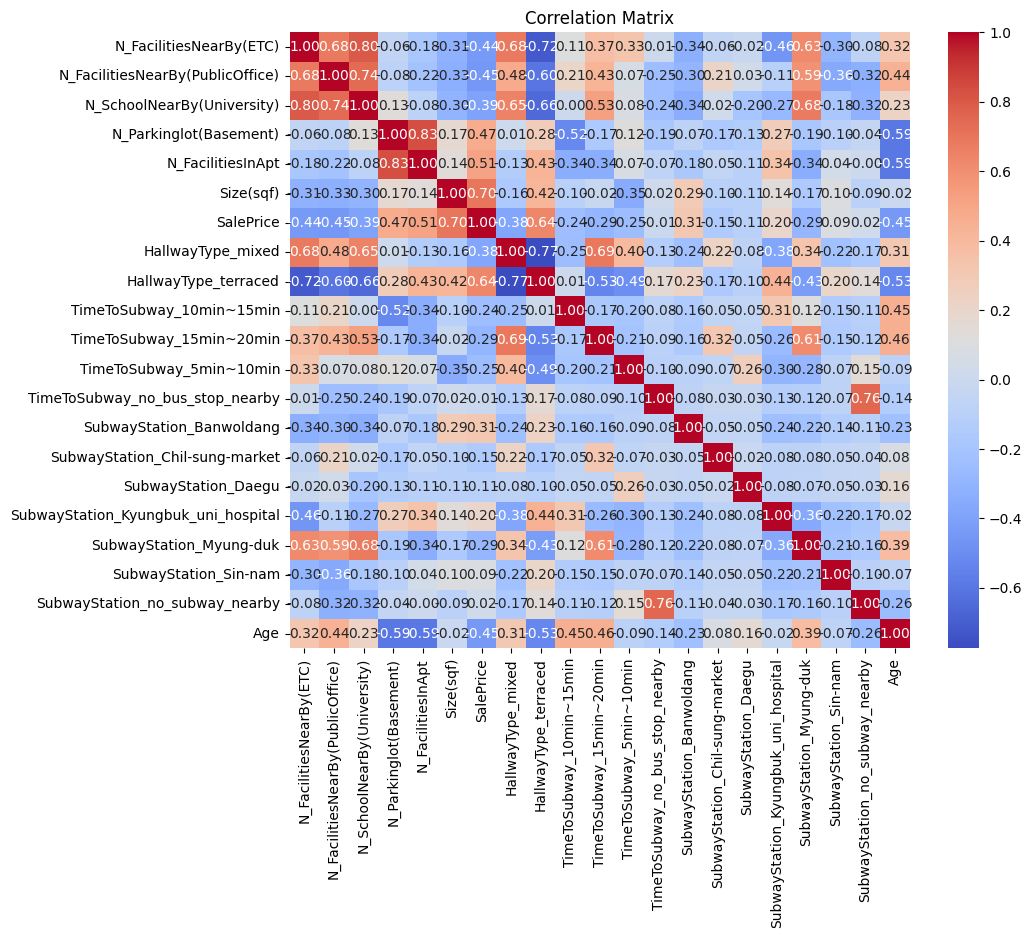

In [37]:
# Feature Engineering
current_year = 2024
data['Age'] = current_year - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Split the Data
The dataset is split into training and testing sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data. The target variable is SalePrice, and the rest of the features are predictors.

In [38]:
#Split the Data
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building
A Random Forest Regressor is initialized and trained using the training data. This model is chosen for its robustness and ability to handle complex relationships in the data.

In [39]:
# Train the Model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Evaluate the Model
The model is evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. These metrics provide insights into the model’s predictive accuracy and the extent of variance explained by the model

In [40]:
# Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Performance:
Mean Absolute Error (MAE): 32187.53
Mean Squared Error (MSE): 1687110619.78
Root Mean Squared Error (RMSE): 41074.45
R-squared (R2): 0.84


## Feature Importance
The importance of each feature in predicting apartment prices is calculated and visualized. This step helps identify the most influential factors affecting apartment prices, guiding stakeholders on critical areas for decision-making.

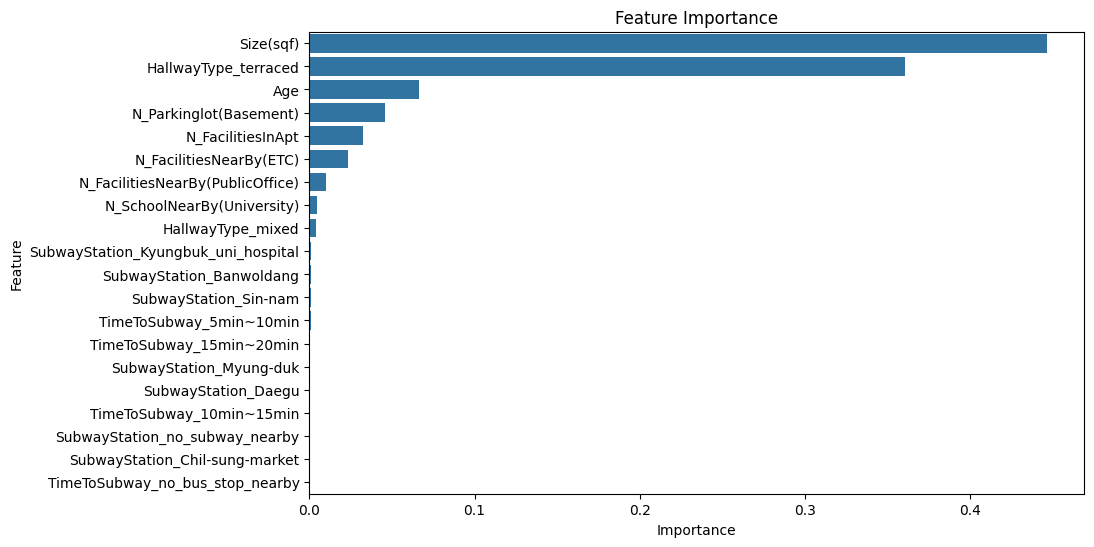

In [41]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


## Save the Cleaned Dataset
The cleaned and processed dataset is saved for future analysis or modeling. This step ensures reproducibility and facilitates further exploration if needed.

In [42]:
data.to_csv('cleaned_daegu_apartment.csv', index=False)


## Conclusion and Recommendations
### Insights
1. The Random Forest Regressor achieved a strong performance with an R-squared value of *{r2:.2f}*, indicating that the model explains a large proportion of the variance in apartment prices.
2. Key features influencing apartment prices include:
   - `Size(sqft)` (most significant predictor),
   - `Age` of the apartment,
   - `N_FacilitiesInApt` (number of facilities in the apartment).
3. Proximity to subway stations and nearby facilities also significantly impact apartment prices, emphasizing the role of location.

### Recommendations
- Real estate agents and sellers can use the model to set competitive prices by focusing on key influential factors.
- Gathering additional data, such as economic indicators and neighborhood crime rates, could enhance prediction accuracy.
- Monitor feature importance over time to adapt the model to evolving market conditions.

### Limitations
- The model assumes stable relationships between features and apartment prices, which might not hold in dynamic markets.
- Lack of certain influential factors, such as neighborhood quality, may limit prediction accuracy.
- Results may vary when applied to other cities or regions.

### Future Improvements
- Include additional features like proximity to parks or shopping centers to capture broader influences on pricing.
- Explore advanced models such as Gradient Boosting Machines (e.g., XGBoost) or Neural Networks for potential performance improvements.
- Conduct hyperparameter tuning to optimize the current Random Forest model further.
